# Mini Project 3 - IV. Word Prediction from Scratch
Modify the neural language model in III so that the model will learn from scratch the embeddings
simultaneously during training. Apply PCA again to these embeddings, plot each word representation
on a 2D graph and compare the results with the embeddings produced by the model in I.

In [1]:
import numpy as np
import tensorflow as tf
from khmernltk import word_tokenize

N = 5
H = 512

2025-01-27 16:51:14.262924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def predict_next_word(model, sentence, word_to_index, index_to_word, vocabs):
    _tokens = word_tokenize(sentence)
    if len(_tokens) < N:
        raise ValueError(f"Expected {N} words, got {len(_tokens)}")
    
    last_2_words = _tokens[-2:]
    # Take the last N words
    _tokens = _tokens[-N:]

    x = np.array([[word_to_index[w] if w in vocabs else 0 for w in _tokens]])
    y = model.predict(x)

    # Get 5 words with the highest probability
    top_indices = np.argsort(y[0])[::-1][:10]

    # Get the words
    top_words = [index_to_word[i] for i in top_indices]

    for w in top_words:
        if w not in last_2_words and w != '<UNK>':
            return w
    
    return top_words[-1]
    # return top_5_words, last_2_words

In [3]:
def generate_text(model, seed, word_to_index, index_to_word, vocabs, n_words=100):
    sentence = seed
    for _ in range(n_words):
        sentence += predict_next_word(model, sentence, word_to_index, index_to_word, vocabs)
    return sentence

## Load Saved Files

In [4]:
file_word_to_index = 'I_word_to_index.npy' # Change as you prefer

In [5]:
# Load word to index
word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'ថែវ': 0,
  'ប្រមាណ': 1,
  'ប៉ុន្តែ': 2,
  'ប្រជាជន': 3,
  'រាង': 4,
  'ក្បាច់': 5,
  'ចំនួន': 6,
  'និង': 7,
  'ដែល': 8,
  'យ៉ាង': 9,
  'បង្ហាញ': 10,
  'សំណង់': 11,
  'ជាង': 12,
  'មកពី': 13,
  'មួយ': 14,
  'ក៏': 15,
  'ទិស': 16,
  'ដូចជា': 17,
  'ប្រទេស': 18,
  'ថ្ងៃ': 19,
  'ឆ្នាំ': 20,
  'ខាងត្បូង': 21,
  'ចម្លាក់': 22,
  'នូវ': 23,
  'អោយ': 24,
  'ត្រូវបាន': 25,
  'ឈើ': 26,
  'សៀមរាប': 27,
  'ស្ថិត': 28,
  'ស្រុក': 29,
  'នគរ': 30,
  'ទី២': 31,
  'ចំ': 32,
  'ភ្នំ': 33,
  'មិន': 34,
  'អាច': 35,
  'កណ្តាល': 36,
  'តូច': 37,
  'មាន': 38,
  'ន័យ': 39,
  'តំបន់': 40,
  'ចុង': 41,
  'បី': 42,
  'នីមួយ': 43,
  'ច្រើន': 44,
  'ធ្វើ': 45,
  'ព័ទ្ធ': 46,
  'បុរៈ': 47,
  'ទីក្រុង': 48,
  'កន្លែង': 49,
  'ធំ': 50,
  'ចូល': 51,
  'អង្គរ': 52,
  'ស្រាល': 53,
  'ព្រះបាទ': 54,
  'អង្គរវត្ត': 55,
  'កម្ពុជា': 56,
  'ឈ្មោះ': 57,
  'ប្រើ': 58,
  'ប្រាសាទ': 59,
  'ដំបូង': 60,
  'កំពែង': 61,
  'ខាងក្នុង': 62,
  'តំណាង': 63,
  'ម៉ែត្រ': 64,
  'សម័យ': 65,
  'គេ': 66,
  'ដល់': 67,
  'ឬ': 68,
  

## Load and Test Existing Model

In [17]:
file_model = 'model_word_prediction2.keras'

In [18]:
model = tf.keras.models.load_model(file_model)

In [19]:
text = generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេដែល", word_to_index, index_to_word, vocabs)

| 2025-01-27 17:00:18,771 | INFO | khmer-nltk | Loaded model from /Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


1/1 [==============================] - 0s 25ms/step


In [20]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេដែលមានឈ្មោះថាជាប្រាសាទអង្គរវត្តជាប្រាសាទនេះគឺប្រាសាទនេះគឺមានប្រាង្គទាំងបីនៃភ្នំឈ្មោះដែលបាននៅឆ្នាំនៃប្រាសាទអង្គរវត្តត្រូវបានគេហៅថាជាខេត្តដែលស្ថិតនៅឆ្នាំដែលបានគេហៅថាជាអង្គរវត្តដែលជាឈ្មោះមួយនៃប្រាសាទនេះដែលស្ថិតនៅខាងក្នុងបំផុតបុរៈប្រាសាទអង្គរវត្តជាប្រាសាទនេះគឺប្រាសាទនេះគឺមានប្រាង្គទាំងបីនៃភ្នំឈ្មោះដែលបាននៅឆ្នាំនៃប្រាសាទអង្គរវត្តត្រូវបានគេហៅថាជាខេត្តដែលស្ថិតនៅឆ្នាំដែលបានគេហៅថាជាអង្គរវត្តដែលជាឈ្មោះ


## Scratch: Train models

### Prepare Dataset

In [6]:
# Read limited tokens
with open("cleaned_tokens.txt", "r") as f:
    cleaned_tokens = f.read().split()

In [7]:
len(cleaned_tokens), cleaned_tokens

(9086,
 ['ប្រាសាទ',
  'អង្គរវត្ត',
  'ឬ',
  'ប្រាសាទ',
  'អង្គរ',
  'តូច',
  'មាន',
  'ទីតាំង',
  'ស្ថិត',
  'នៅ',
  'ភាគ',
  'ខាងជើង',
  'នៃ',
  'ក្រុង',
  'សៀមរាប',
  'នៃ',
  'ខេត្ត',
  'សៀមរាប',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'ព្រហ្មញ្ញ',
  'សាសនា',
  'ធំ',
  'បំផុត',
  'និង',
  'ជា',
  'វិមាន',
  'សាសនា',
  'ដ៏',
  'ធំ',
  'បំផុត',
  'នៅក្នុង',
  'លោក',
  'ប្រាសាទ',
  'នេះ',
  'ត្រូវបាន',
  'កសាងឡើង',
  'ដោយ',
  'ព្រះបាទ',
  'សូរ្យ',
  'វរ្ម័ន',
  'ទី២',
  'ដែល',
  'ជា',
  'ស្នាដៃ',
  'ដ៏',
  'ធំ',
  'អស្ចារ្យ',
  'និង',
  'មាន',
  'ឈ្មោះ',
  'ល្បីល្បាញ',
  'រន្ទឺ',
  'សុះ',
  'សាយ',
  'ទៅ',
  'គ្រប់',
  'ទិសទី',
  'លើ',
  'ពិភពលោក',
  'ប្រាសាទ',
  'នេះ',
  'សាងសង់',
  'ឡើង',
  'នៅ',
  'ដើម',
  'សតវត្ស',
  'ទី',
  'ដែល',
  'ស្ថិត',
  'នៅក្នុង',
  'រាជធានី',
  'សោធរ',
  'បុរៈ',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'កសាងឡើង',
  'ដើម្បី',
  'ឧទ្ទិស',
  'ដល់',
  'ព្រះវិស្ណុ',
  'ប្រាសាទ',
  'នេះ',
  'ជា',
  'ប្រាសាទ',
  'ដែល',
  'នៅ',
  'គង់វង្ស',
  'ល

In [8]:
# Create training data
X = []
y = []
for i in range(len(cleaned_tokens) - N):
    X.append(cleaned_tokens[i:i+N])
    y.append(cleaned_tokens[i+N])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((9081, 5), (9081,))

In [9]:
print(X[0], y[0])
print(X[1], y[1])

['ប្រាសាទ' 'អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ'] តូច
['អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ' 'តូច'] មាន


In [10]:
print(word_to_index['<UNK>'])

174


In [11]:
# Convert words to indices. 
X_indices = []
y_indices = []
for i in range(len(X)):
    X_indices.append([word_to_index[w] if w in vocabs else 174 for w in X[i]])
    y_indices.append(word_to_index[y[i]] if y[i] in vocabs else 174)

X_indices = np.array(X_indices)
y_indices = np.array(y_indices)
X_indices.shape, y_indices.shape

((9081, 5), (9081,))

In [13]:
X_indices[0], y_indices[0], X[0], y[0]

(array([59, 55, 68, 59, 52]),
 37,
 array(['ប្រាសាទ', 'អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ'], dtype='<U20'),
 'តូច')

### Neural Network Model 1

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(vocabs), output_dim=50, input_length=N, trainable=True))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(H, activation='sigmoid'))
model.add(tf.keras.layers.Dense(len(vocabs), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 50)             8750      
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               128512    
                                                                 
 dense_3 (Dense)             (None, 175)               89775     
                                                                 
Total params: 227037 (886.86 KB)
Trainable params: 227037 (886.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_indices, y_indices, epochs=100, batch_size=128)

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 3.6727 - accuracy: 0.3779
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 3.4378 - accuracy: 0.4230
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 3.4001 - accuracy: 0.4230
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 3.3601 - accuracy: 0.4228
Epoch 5/100
71/71 [==============================] - 0s 6ms/step - loss: 3.3182 - accuracy: 0.4231
Epoch 6/100
71/71 [==============================] - 0s 6ms/step - loss: 3.2744 - accuracy: 0.4239
Epoch 7/100
71/71 [==============================] - 0s 6ms/step - loss: 3.2218 - accuracy: 0.4250
Epoch 8/100
71/71 [==============================] - 0s 6ms/step - loss: 3.1652 - accuracy: 0.4258
Epoch 9/100
71/71 [==============================] - 0s 5ms/step - loss: 3.1152 - accuracy: 0.4277
Epoch 10/100
71/71 [==============================] - 1s 7ms/step - loss: 3.0653 - accuracy: 0.4295
Epoch 11/

In [29]:
# Save model
model.save("model_word_prediction2.keras")

In [26]:
word = "ប្រាសាទអង្គរវត្តត្រូវបានគេដែលត្រូវបានគេដែលមានប្រាសាទនៅមានប្រាសាទអង្គរវត្ត"
predict_next_word(model, word, word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 153ms/step


'ស្ថិត'

In [27]:
text = generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេដែល", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 24ms/step


In [28]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេដែលប៉ុន្តែវាឡើយត្រូវបានសំណង់ប្រាសាទសម័យអង្គរកន្លែងដើមរបស់ប្រាសាទវាគឺជាគេបំផុតចំពោះជាអង្គរដែលបានទៅលើឈ្មោះប្រាសាទបុរាណមួយដែលគេដើមឡើយរចនាបថបន្ទាយស្រីស្ថិតនៅក្នុងស្ថាបត្យកម្មនេះគឺជាផ្នែកកម្ពុជានិងថែវខាងជើងទីបីពីច្រកចូលនិងតាមទីមួយពីប្រាសាទនេះពីប្រាសាទគឺមួយដែលគេនៅខាងជើងក្បាច់ប្រាសាទខាងលិចនិងខាងក្នុងខាងត្បូងថែវខាងលិចនេះខាងក្នុងមានថែវខាងលិចបង្ហាញថាជាច្រកខាងជើងដ៏ធំនៃភ្នំមានប្រាសាទអង្គរវត្តជាប្រាសាទផ្នែកច្រើនគេក្នុងរចនាបថនេះមានលក្ខណៈពីឈ្មោះ


In [21]:
# Save the new embeddings
embeddings = model.layers[0].get_weights()[0]
embeddings.shape, embeddings

((175, 50),
 array([[ 0.03760326,  0.03968043,  0.01123617, ..., -0.04375256,
         -0.02878731, -0.00258929],
        [ 0.03259213,  0.02427429, -0.04750289, ..., -0.03198962,
         -0.01273973, -0.00386566],
        [ 0.02101684,  0.01973584, -0.02294216, ...,  0.03336713,
         -0.04426724,  0.02021507],
        ...,
        [-0.03000308, -0.01925005,  0.03020585, ...,  0.02784591,
          0.00851282,  0.04762368],
        [ 0.00643491,  0.03835062,  0.01042347, ...,  0.0435362 ,
          0.01735744,  0.00482085],
        [-0.02320323, -0.04241797,  0.03986536, ..., -0.04717736,
         -0.04766016, -0.01936871]], dtype=float32))

In [23]:
word_to_embedding = {k: embeddings[v] for k, v in word_to_index.items()}
word_to_embedding

{'ថែវ': array([ 0.03760326,  0.03968043,  0.01123617,  0.04895487,  0.0359975 ,
        -0.02206038, -0.0472873 , -0.0306548 ,  0.0156155 , -0.03798572,
        -0.00433423, -0.02208222,  0.00121726,  0.0128937 , -0.04005994,
        -0.04176195,  0.03435408,  0.04632494,  0.01921146,  0.03355635,
        -0.02246437,  0.04534093,  0.01529754, -0.04094503,  0.03197372,
        -0.03391013, -0.03124123,  0.04299987, -0.0001464 ,  0.04428718,
        -0.00879527,  0.03954697, -0.01788474,  0.02632353,  0.00486029,
         0.01245265,  0.01906418,  0.03269062,  0.00531272,  0.01386751,
         0.02347208,  0.0209452 ,  0.00546294, -0.03979335,  0.0406256 ,
         0.00133999,  0.02270159, -0.04375256, -0.02878731, -0.00258929],
       dtype=float32),
 'ប្រមាណ': array([ 0.03259213,  0.02427429, -0.04750289,  0.01234607, -0.02978203,
         0.04950017, -0.03311108,  0.03186636, -0.02450342, -0.0061122 ,
        -0.01716471, -0.04070928, -0.04758371, -0.03840151, -0.02209216,
        -0

In [30]:
np.save("IV_word_to_embedding.npy", word_to_embedding)

## Apply PCA and Visualization

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
file_word_embbedings = "IV_word_to_embedding.npy" # Change as you prefer
file_word_to_index = "I_word_to_index.npy" # Change as you prefer

In [33]:
word_to_embeddings2 = np.load(file_word_embbedings, allow_pickle=True).item()
word_to_embeddings2

{'ថែវ': array([ 0.03760326,  0.03968043,  0.01123617,  0.04895487,  0.0359975 ,
        -0.02206038, -0.0472873 , -0.0306548 ,  0.0156155 , -0.03798572,
        -0.00433423, -0.02208222,  0.00121726,  0.0128937 , -0.04005994,
        -0.04176195,  0.03435408,  0.04632494,  0.01921146,  0.03355635,
        -0.02246437,  0.04534093,  0.01529754, -0.04094503,  0.03197372,
        -0.03391013, -0.03124123,  0.04299987, -0.0001464 ,  0.04428718,
        -0.00879527,  0.03954697, -0.01788474,  0.02632353,  0.00486029,
         0.01245265,  0.01906418,  0.03269062,  0.00531272,  0.01386751,
         0.02347208,  0.0209452 ,  0.00546294, -0.03979335,  0.0406256 ,
         0.00133999,  0.02270159, -0.04375256, -0.02878731, -0.00258929],
       dtype=float32),
 'ប្រមាណ': array([ 0.03259213,  0.02427429, -0.04750289,  0.01234607, -0.02978203,
         0.04950017, -0.03311108,  0.03186636, -0.02450342, -0.0061122 ,
        -0.01716471, -0.04070928, -0.04758371, -0.03840151, -0.02209216,
        -0

In [41]:
word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
index_to_word = {v: k for k, v in word_to_index.items()}
word_to_index, index_to_word

({'ថែវ': 0,
  'ប្រមាណ': 1,
  'ប៉ុន្តែ': 2,
  'ប្រជាជន': 3,
  'រាង': 4,
  'ក្បាច់': 5,
  'ចំនួន': 6,
  'និង': 7,
  'ដែល': 8,
  'យ៉ាង': 9,
  'បង្ហាញ': 10,
  'សំណង់': 11,
  'ជាង': 12,
  'មកពី': 13,
  'មួយ': 14,
  'ក៏': 15,
  'ទិស': 16,
  'ដូចជា': 17,
  'ប្រទេស': 18,
  'ថ្ងៃ': 19,
  'ឆ្នាំ': 20,
  'ខាងត្បូង': 21,
  'ចម្លាក់': 22,
  'នូវ': 23,
  'អោយ': 24,
  'ត្រូវបាន': 25,
  'ឈើ': 26,
  'សៀមរាប': 27,
  'ស្ថិត': 28,
  'ស្រុក': 29,
  'នគរ': 30,
  'ទី២': 31,
  'ចំ': 32,
  'ភ្នំ': 33,
  'មិន': 34,
  'អាច': 35,
  'កណ្តាល': 36,
  'តូច': 37,
  'មាន': 38,
  'ន័យ': 39,
  'តំបន់': 40,
  'ចុង': 41,
  'បី': 42,
  'នីមួយ': 43,
  'ច្រើន': 44,
  'ធ្វើ': 45,
  'ព័ទ្ធ': 46,
  'បុរៈ': 47,
  'ទីក្រុង': 48,
  'កន្លែង': 49,
  'ធំ': 50,
  'ចូល': 51,
  'អង្គរ': 52,
  'ស្រាល': 53,
  'ព្រះបាទ': 54,
  'អង្គរវត្ត': 55,
  'កម្ពុជា': 56,
  'ឈ្មោះ': 57,
  'ប្រើ': 58,
  'ប្រាសាទ': 59,
  'ដំបូង': 60,
  'កំពែង': 61,
  'ខាងក្នុង': 62,
  'តំណាង': 63,
  'ម៉ែត្រ': 64,
  'សម័យ': 65,
  'គេ': 66,
  'ដល់': 67,
  'ឬ': 68,
  'ក្រុម

In [36]:
index_to_embeddings = {v: word_to_embeddings2[k] for k, v in word_to_index.items()}
index_to_embeddings

{0: array([ 0.03760326,  0.03968043,  0.01123617,  0.04895487,  0.0359975 ,
        -0.02206038, -0.0472873 , -0.0306548 ,  0.0156155 , -0.03798572,
        -0.00433423, -0.02208222,  0.00121726,  0.0128937 , -0.04005994,
        -0.04176195,  0.03435408,  0.04632494,  0.01921146,  0.03355635,
        -0.02246437,  0.04534093,  0.01529754, -0.04094503,  0.03197372,
        -0.03391013, -0.03124123,  0.04299987, -0.0001464 ,  0.04428718,
        -0.00879527,  0.03954697, -0.01788474,  0.02632353,  0.00486029,
         0.01245265,  0.01906418,  0.03269062,  0.00531272,  0.01386751,
         0.02347208,  0.0209452 ,  0.00546294, -0.03979335,  0.0406256 ,
         0.00133999,  0.02270159, -0.04375256, -0.02878731, -0.00258929],
       dtype=float32),
 1: array([ 0.03259213,  0.02427429, -0.04750289,  0.01234607, -0.02978203,
         0.04950017, -0.03311108,  0.03186636, -0.02450342, -0.0061122 ,
        -0.01716471, -0.04070928, -0.04758371, -0.03840151, -0.02209216,
        -0.00252464, 

In [37]:
# Sort dictionary by key
index_to_embeddings = dict(sorted(index_to_embeddings.items()))
index_to_embeddings

{0: array([ 0.03760326,  0.03968043,  0.01123617,  0.04895487,  0.0359975 ,
        -0.02206038, -0.0472873 , -0.0306548 ,  0.0156155 , -0.03798572,
        -0.00433423, -0.02208222,  0.00121726,  0.0128937 , -0.04005994,
        -0.04176195,  0.03435408,  0.04632494,  0.01921146,  0.03355635,
        -0.02246437,  0.04534093,  0.01529754, -0.04094503,  0.03197372,
        -0.03391013, -0.03124123,  0.04299987, -0.0001464 ,  0.04428718,
        -0.00879527,  0.03954697, -0.01788474,  0.02632353,  0.00486029,
         0.01245265,  0.01906418,  0.03269062,  0.00531272,  0.01386751,
         0.02347208,  0.0209452 ,  0.00546294, -0.03979335,  0.0406256 ,
         0.00133999,  0.02270159, -0.04375256, -0.02878731, -0.00258929],
       dtype=float32),
 1: array([ 0.03259213,  0.02427429, -0.04750289,  0.01234607, -0.02978203,
         0.04950017, -0.03311108,  0.03186636, -0.02450342, -0.0061122 ,
        -0.01716471, -0.04070928, -0.04758371, -0.03840151, -0.02209216,
        -0.00252464, 

In [38]:
# Create a list of embeddings from the dictionary
embeddings = [v for k, v in index_to_embeddings.items()]
embeddings

[array([ 0.03760326,  0.03968043,  0.01123617,  0.04895487,  0.0359975 ,
        -0.02206038, -0.0472873 , -0.0306548 ,  0.0156155 , -0.03798572,
        -0.00433423, -0.02208222,  0.00121726,  0.0128937 , -0.04005994,
        -0.04176195,  0.03435408,  0.04632494,  0.01921146,  0.03355635,
        -0.02246437,  0.04534093,  0.01529754, -0.04094503,  0.03197372,
        -0.03391013, -0.03124123,  0.04299987, -0.0001464 ,  0.04428718,
        -0.00879527,  0.03954697, -0.01788474,  0.02632353,  0.00486029,
         0.01245265,  0.01906418,  0.03269062,  0.00531272,  0.01386751,
         0.02347208,  0.0209452 ,  0.00546294, -0.03979335,  0.0406256 ,
         0.00133999,  0.02270159, -0.04375256, -0.02878731, -0.00258929],
       dtype=float32),
 array([ 0.03259213,  0.02427429, -0.04750289,  0.01234607, -0.02978203,
         0.04950017, -0.03311108,  0.03186636, -0.02450342, -0.0061122 ,
        -0.01716471, -0.04070928, -0.04758371, -0.03840151, -0.02209216,
        -0.00252464, -0.023

In [40]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings

array([[ 0.01551111,  0.05186019],
       [-0.00586337,  0.01458091],
       [ 0.01238247,  0.10883847],
       [ 0.01523372, -0.0321659 ],
       [ 0.04871871,  0.07235721],
       [-0.04737547, -0.02035281],
       [-0.02352519, -0.04593077],
       [-0.03724908, -0.01315664],
       [ 0.09326236,  0.04536983],
       [ 0.00205663, -0.00809285],
       [-0.0800039 ,  0.02836726],
       [ 0.03640191,  0.00246759],
       [ 0.04725129,  0.0389505 ],
       [-0.02479133, -0.08905267],
       [-0.0297846 , -0.05403699],
       [ 0.01410334, -0.01476461],
       [-0.0064739 ,  0.0545167 ],
       [-0.02503391, -0.00558242],
       [ 0.05600529, -0.0880467 ],
       [ 0.02001327, -0.05865001],
       [ 0.00257803, -0.01557925],
       [-0.00893321,  0.04879946],
       [ 0.04780596, -0.01326705],
       [ 0.0044011 , -0.09184913],
       [-0.02406891, -0.04088395],
       [ 0.04481773, -0.02510312],
       [ 0.03086205, -0.04274728],
       [-0.02990636, -0.02126009],
       [ 0.03603433,

In [43]:
# Map the reduced embeddings to the words
reduced_word_embeddings = {index_to_word[i]: emb for i, emb in enumerate(reduced_embeddings)}
reduced_word_embeddings

{'ថែវ': array([0.01551111, 0.05186019]),
 'ប្រមាណ': array([-0.00586337,  0.01458091]),
 'ប៉ុន្តែ': array([0.01238247, 0.10883847]),
 'ប្រជាជន': array([ 0.01523372, -0.0321659 ]),
 'រាង': array([0.04871871, 0.07235721]),
 'ក្បាច់': array([-0.04737547, -0.02035281]),
 'ចំនួន': array([-0.02352519, -0.04593077]),
 'និង': array([-0.03724908, -0.01315664]),
 'ដែល': array([0.09326236, 0.04536983]),
 'យ៉ាង': array([ 0.00205663, -0.00809285]),
 'បង្ហាញ': array([-0.0800039 ,  0.02836726]),
 'សំណង់': array([0.03640191, 0.00246759]),
 'ជាង': array([0.04725129, 0.0389505 ]),
 'មកពី': array([-0.02479133, -0.08905267]),
 'មួយ': array([-0.0297846 , -0.05403699]),
 'ក៏': array([ 0.01410334, -0.01476461]),
 'ទិស': array([-0.0064739,  0.0545167]),
 'ដូចជា': array([-0.02503391, -0.00558242]),
 'ប្រទេស': array([ 0.05600529, -0.0880467 ]),
 'ថ្ងៃ': array([ 0.02001327, -0.05865001]),
 'ឆ្នាំ': array([ 0.00257803, -0.01557925]),
 'ខាងត្បូង': array([-0.00893321,  0.04879946]),
 'ចម្លាក់': array([ 0.04780596, -

### Plot

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

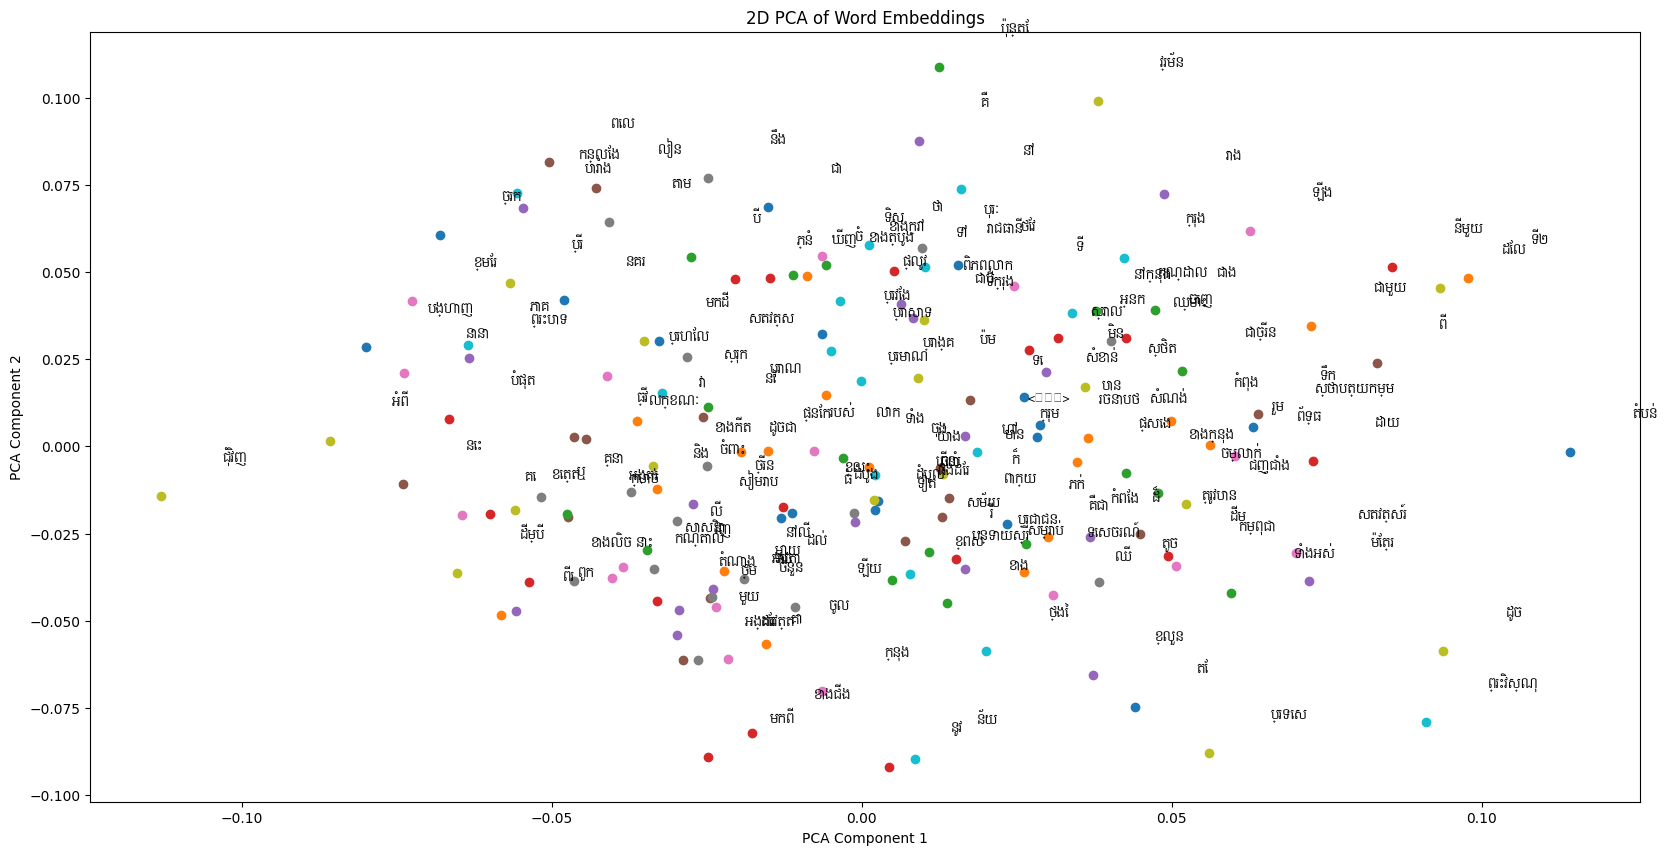

In [44]:
import pathlib
# from matplotlib.font_manager import FontProperties

# font = FontProperties(fname='KhmerOSContent-Regular.ttf')

# Plot the reduced embeddings
plt.figure(figsize=(20, 10))
for word, coord in reduced_word_embeddings.items():
    plt.scatter(coord[0], coord[1])
    plt.text(coord[0] + 0.01, coord[1] + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()